<h1> Credit Card Fraud Detection </h1>

<h2> Introduction </h2>
Recognizing fraud is vital to credit card companies such that they are not charged for purchases they did not make.

<h3> Dataset Properties </h3>
<ul>
    <li> Contains transactions from cc's by European cardholders in Sept. 2013 </li>
    <li> The dataset is highly unbalanced - fraud transactions account for 492 out of 284807 total (0.172 %) </li>
    <li> The dataset input variables consist of components obtained with PCA other than 'time' and 'account' </li>
    <li> Supervised learning, we have a class target that shows if it is fraud 1 or not 0 </li>
    <li> given the unbalanced nature - measure accuracy using AUC, ROC, -> confusion matrix not meaningful for unbalanced classification </li>

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns


## Getting Started
* Look at the dataset, features, targets
* Describe, visualize
* Clean

In [2]:
# lets load the data into a csv
file_name = "creditcard.csv"
root = "D:/Datasets/CreditCardsKaggle"
df = pd.read_csv(os.path.join(root, file_name))

In [3]:
df.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.656562e-16 -3.444850e-16  2.578648e-16  4.471968e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.687098e-15 -3.666453e-16 -1.220404e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [5]:
non_fraud = len(df[df["Class"] == 0])
fraud = len(df) - non_fraud
print(f"Data set has {non_fraud} non fraud transactions and {fraud} fraud transactions ({np.round(fraud/(non_fraud+fraud)*100,4)} %)")
print("Very unbalanced")

Data set has 284315 non fraud transactions and 492 fraud transactions (0.1727 %)
Very unbalanced


#### Imbalanced Dataset
* Training supervised models will not be able to detect outliers because of the significant amount of non-fraud labels.
* The model will not have enough training examples to correctly classify the fraud entries

### Features and Target
* 30 features - PCA applied to 28 - what they signify is unknown.
    * These features have been scaled already, however
* We do have amount, and time for the transaction. 
* We can visualize how they affect the response

In [6]:
df.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

### Visualization
* In this section, we compare the distributions of each feature for valid and fraud transactions
* We will also fit a gaussian to see how different our data is from a normal distribution

In [7]:
X = df[np.array(df.columns)[:-1]]
y = df[np.array(df.columns[-1])]

In [8]:
from scipy.stats import norm

In [9]:
mean, std = norm.fit(df["V11"])

In [10]:
mean

1.673326932726423e-15

In [11]:
std

1.0207112357718875

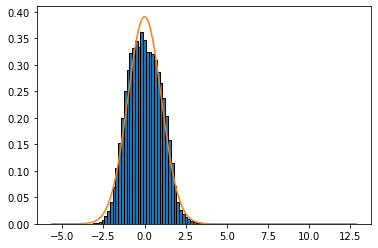

In [12]:
count, bins, _ = plt.hist(df["V11"], density=True, bins = 100, ec = 'black') #[1,19])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
yplot = norm.pdf(x, mean, std)
plt.plot(x,yplot)
plt.show()

In [13]:
X

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.251412 -0.018307   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.069083 -0.225775   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.524980  0.247998   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.208038 -0.108300   
4       0.095921  0.592941 -0.270533  0.817739  ...  0.408542 -0.009431   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  1.475829  0.213454   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.059616  0.214205   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.001396  0.232045   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.127434  0.265245   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.382948  0.261057   

             V22       V23       V24       V25       V26       V27       V28  \
0       0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1      -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2       0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3       0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4       0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.111864  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731   
284803  0.924384  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   
284804  0.578229 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   
284805  0.800049 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   
284806  0.643078  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649   

        Amount  
0       149.62  
1         2.69  
2       378.66  
3       123.50  
4        69.99  
...        ...  
284802    0.77  
284803   24.79  
284804   67.88  
284805   10.00  
284806  217.00  

[284807 rows x 30 columns]

In [14]:
features = [col for col in X.columns if "V" in col]
fig, axs = plt.subplots(len(features), 1)

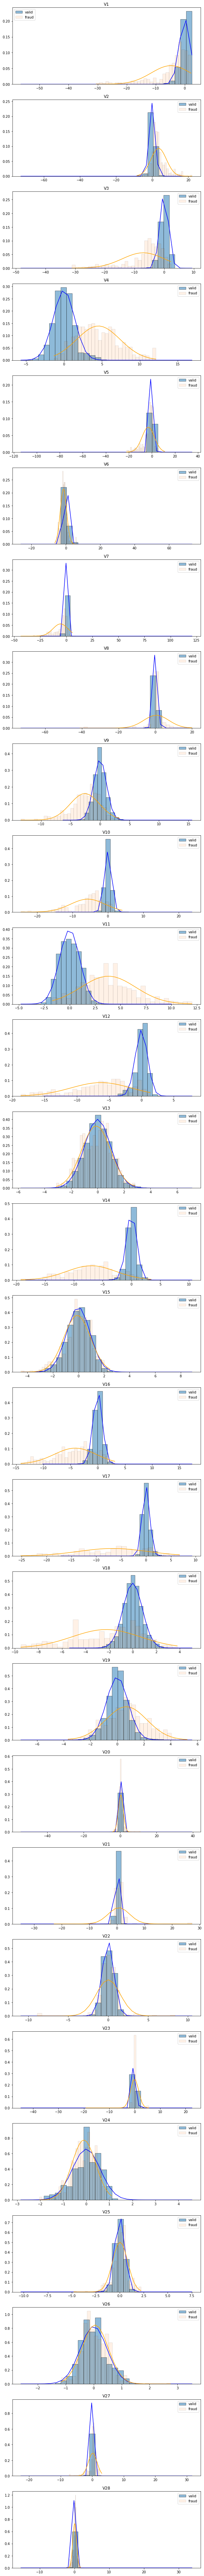

In [15]:
%matplotlib inline
features = [col for col in X.columns if "V" in col]
fig, axs = plt.subplots(len(features), 1, figsize = (10,5*len(features)))
HIST_BINS = 30
PLOT_PTS = 30
i = 0
for i, feature in enumerate(features):
    axs[i].hist(df[df["Class"] == 0][feature], density=True, bins = HIST_BINS, ec = 'black', alpha = 0.5) #[1,19])
    axs[i].hist(df[df["Class"] == 1][feature], density=True, bins = HIST_BINS, ec = 'black', alpha = 0.1) #[1,19])
    axs[i].legend(['valid', 'fraud'] )

    xmin, xmax = min(df[df["Class"] == 0][feature]),  max(df[df["Class"] == 0][feature])
    xmin_f, xmax_f = min(df[df["Class"] == 1][feature]),  max(df[df["Class"] == 1][feature])
    x_valid = np.linspace(xmin, xmax, PLOT_PTS)
    x_fraud = np.linspace(xmin_f, xmax_f, PLOT_PTS)
    y_valid = norm.pdf(x_valid, norm.fit(df[df["Class"] == 0][feature])[0], norm.fit(df[df["Class"] == 0][feature])[1])
    y_fraud = norm.pdf(x_fraud, norm.fit(df[df["Class"] == 1][feature])[0], norm.fit(df[df["Class"] == 1][feature])[1])
    
    axs[i].plot(x_valid, y_valid, color = 'b')
    axs[i].plot(x_fraud, y_fraud, color = 'orange')
    
    
    
    axs[i].set_title(feature)

plt.show()
fig.tight_layout(pad=3.0)

## Feature Engineering / Train, Test, Split
* All the features have been cleaned already
* train test split

In [16]:
len(X)

284807

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3.0, random_state = 1)

## Gaussian Distribution
* Lets look at how each feature can predict fraud or not
* we can use ROC curve for each feature, fitting non-fraud transactions
* ROC is a plot x = FPR (false positives over all the true non-fraudulent cases) and y = TPR (recall) (true positive over all real positive/fraud cases)
    * ROC curve is obtained by changing the classification threshold (Each threshold will produce a certain TPR and FPR)
    * **Algorithm**
        * fit a gaussian on a feature. We can use GaussianMixture from Sklearn
        * set a classification threshold. If over threshold, it is fraud 1, else valid 0
        * Then, we go through each data point/example
        * check if the example/record is inside the gaussian - calculate probability that a gaussian will generate that point randomly
            * yes: valid - 0
            * no: fraud - 1
        * repeat steps 2 - 4 while adjusting the threshold
* The best model will be one with AUC close to 1 - meaning we have a low FPR with a high TPR


In [18]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from scipy import stats
def estimate_2feat_gaussian(v1, v2):
    sum1 = np.sum(v1)
    sum2 = np.sum(v2)
    
    mu = [sum1/len(v1), sum2/len(v2)]
    
    sigma1 = 1/(len(v1) - 1) * np.sum((v1 - mu[0])**2)
    sigma2 = 1/(len(v2) - 1) * np.sum((v2 - mu[1])**2)
    
    return mu, [sigma1, sigma2]

def estimate_gaussian(feat):
    mu = np.sum(feat)/len(feat)
    sigma = 1/(len(feat)) * np.sum((feat - mu) ** 2)
    return mu, np.sqrt(sigma)

### One Feature
Lets test the algorithm and look into the gmm for 1 feature only

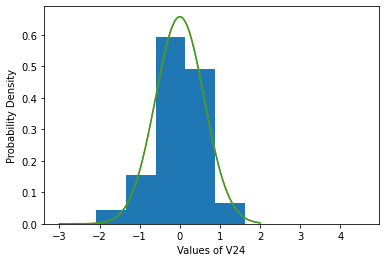

In [19]:
# Data distribution
plt.hist(X_train["V24"], density = True)

# fitting normal distribution
mu_norm, s_norm = estimate_gaussian(X_train["V24"])
x = np.linspace(-3,2,200) # we will look at the probabilities of arbitrary x values. Which are arbitrary values of V24
y_stats = stats.norm.pdf(x, loc = mu_norm, scale = s_norm)
plt.plot(x, y_stats)

# fitting gaussian mixture model
gmm = GaussianMixture(n_components = 1, random_state = 0)
gmm.fit(X_train["V24"].values.reshape(-1,1)) # fit our data into gauss mm
y_gmm = np.exp(gmm.score_samples(x.reshape(-1,1))) # score samples returns weighted log prob. Exp just gives probability
plt.plot(x, y_gmm)

plt.ylabel("Probability Density")
plt.xlabel("Values of V24")
plt.show()

### ROC Curve and AUC performance

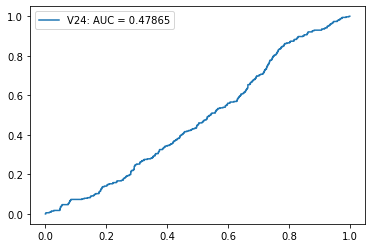

In [20]:
# compute log probability of samples belonging to gaussian
log_prob_valid = gmm.score_samples(X_train["V24"].values.reshape(-1,1))
fpr, tpr, thresholds = roc_curve(y_train, 1 - np.exp(log_prob_valid)) # get fpr, tpr, thresholds
feat_auc = roc_auc_score(y_train, 1 - np.exp(log_prob_valid)) # get auc

label = "V24: AUC = " + str(np.round(feat_auc,5))
plt.plot(fpr,tpr, label = label)

plt.legend(loc="best")
plt.show()


### Finding the best gaussian model for 1 feature

In [21]:
def get_roc_params(y, prob_class_0):
    fpr, tpr, thresholds = roc_curve(y, prob_class_0)
    auc = roc_auc_score(y, prob_class_0)
    return fpr, tpr, thresholds, auc

In [ ]:
best_model = {"feature": None, "AUC": 0}
feature_aucs = {}
plt.figure(figsize = (12,12))
for feat in X_train.columns:
    gm = GaussianMixture(n_components=1, random_state = 0)
    gm.fit(X_train[y_train == 0][feat].values.reshape(-1,1)) # fit only valid transactions, no anomalies
    
    # compute log probability of samples belonging to gaussian
    log_prob_valid = gm.score_samples(X_train[feat].values.reshape(-1,1))
    fpr, tpr, thresholds, feat_auc = get_roc_params(y_train, 1 - np.exp(log_prob_valid)) # get fpr, tpr, thresholds, auc
    feature_aucs[feat] = feat_auc

    
    if feat_auc > best_model["AUC"]:
        best_model = {"feature": feat, "AUC": feat_auc}
       
    label = f"{feat}: AUC = {np.round(feat_auc,5)}"
    plt.plot(fpr,tpr, label = label)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="best", title = "AUC -> 1 perfectly separates fraud/valid, no FPs")
plt.show()

print(f"The best feature to overall distinguish valid/fraud is {best_model['feature']}, with an AUC of {best_model['AUC']}" )

# df containing the AUC of all features
feature_auc_df = pd.DataFrame({"feature":list(feature_aucs.keys()), "AUC":list(feature_aucs.values())})

## Gaussian Model (1 feature) Evaluation
### Finding best threshold for best overall feature and evaluating precision/recall etc.

In [ ]:
def eval_model(n_components, threshold, selected_feats, X_train, X_test, y_train, y_test):
    """
    This function will evaluate the performance of a model with a specified threshold, # of gaussian components, and selected features
    It will print out the ROC for the train, and print the metrics (f1, precision, recall) for both the train and test set
    """
    gm = GaussianMixture(n_components=int(n_components), random_state=0)
    gm.fit(X_train[y_train == 0][selected_feats])
    
    train_log_prob = gm.score_samples(X_train[selected_feats])
    test_log_prob = gm.score_samples(X_test[selected_feats])
    
    train_score = (f1_score(y_train, train_log_prob < threshold), precision_score(y_train, train_log_prob < threshold), recall_score(y_train, train_log_prob < threshold))
    test_score = (f1_score(y_test,test_log_prob < threshold), precision_score(y_test,test_log_prob < threshold), recall_score(y_test,test_log_prob < threshold))   
    
    print_metrics(y_train, train_log_prob < threshold,which_set='training')
    fpr_test,tpr_test,_,auc = get_roc_params(y_train,1-train_log_prob)
    print_metrics(y_test,test_log_prob< threshold,which_set='testing')
    return {"features": selected_feats, 
            "train_f1_precision_recall": train_score, 
            "test_f1_precision_recall": test_score,
            "num_components": n_components}
    
    
    
def print_metrics(y_true,preds,which_set="training"):
    """ This function will print the f1, precision, and recall scores of the model"""
    f1 = f1_score(y_true,preds)
    rec = recall_score(y_true,preds)
    prec = precision_score(y_true,preds)
    print('For the {} set, the gaussian model produced the following scores:'.format(which_set))
    print('F1 score: {}'.format(f1))
    print('Recall score: {}'.format(rec))
    print('Precision score: {}'.format(prec))
    
    return f1,rec,prec

In [ ]:
models = {} # lets store all our different models in a dictionary

def get_models_summaries(models: dict)->pd.DataFrame:
    """
    This function takes in the models dictionary and outputs a neatly formatted models summary dataframe
    The dataframe will organize the models and their training, and test scores for: f1, precision, and recall
    """
    model_list, train_scores, test_scores, components = [], [], [], []

    for k, v in models.items():
        model_list.append(k)
        train_scores.append(np.round(v['train_f1_precision_recall'],4))
        test_scores.append(np.round(v['test_f1_precision_recall'],4))
        components.append(v['num_components'])

    model_summaries = pd.DataFrame({"model": model_list, "train_f1_precision_recall": train_scores, "test_f1_precision_recall": test_scores, "number_components": components})
    model_summaries.set_index("model")
    
    return model_summaries

In [ ]:
best_feat = best_model["feature"]
gm = GaussianMixture(n_components=1, random_state = 0)
gm.fit(X_train[y_train == 0][best_feat].values.reshape(-1,1)) # fit only valid transactions, no anomalies

# compute log probability of samples belonging to gaussian
log_prob_valid = gm.score_samples(X_train[best_feat].values.reshape(-1,1))
fpr, tpr, thresholds, feat_auc = get_roc_params(y_train, 1 - np.exp(log_prob_valid)) # get fpr, tpr, thresholds, auc

best_score = 0
best_threshold = 0

for i in range(0, len(log_prob_valid[:341]),20):
    threshold = sorted(log_prob_valid)[i]
    score = f1_score(y_train, log_prob_valid < threshold) # if greater than threshold, its 0 -> fraud
    if score > best_score:
        best_score = score
        best_threshold = threshold
        
print(f"The best score found was {best_score} using a threshold of {best_threshold}")

models["1"] = eval_model(1, best_threshold, [best_feat], X_train, X_test, y_train, y_test)

## Multivariate and Mixture of Gaussian Distributions

* In this section, I will be doing model tuning. 
* This tuning mostly involves:
    * testing different variables/features
    * testing different hyperaparameters: components

In [ ]:
def find_opt_gaus_components(selected_feats, num_components):
    """
    This function will find the optimal number of components and the optimal threshold that will maximize
    the f1 score on the TRAINING set. These are based on a specified list of features.
    
    Output: 3 arrays. 
    The first array holds the number of components, 
    the second holds the optimal thresholds for the specific number of components.
    The third array holds the best f1 training scores for each component.
    
    Algorithm will initialize a gm model for the number of component, go over the thresholds (i) which is just
    the probability that would distinguish an outlier then find the f1 score. If it is the best score, then keep 
    the threshold. 
    """
    num_components = np.arange(1,num_components) # define the range of components to test
    nc_best_threshold = [] # holds the best thresholds for a specified number of component
    nc_best_score = []
    best_model = {} # This will hold the optimal model parameters (threshold + number of components)
    best_c = 0
    # find optimal number of components
    for num_c in num_components:
        gm = GaussianMixture(n_components=num_c, random_state=0) # initialize gm 
        gm.fit(X_train[y_train == 0][selected_feats]) # train model
        log_prob = gm.score_samples(X_train[selected_feats]) # find probabilities of each sample belonging to distribution
        print('Number of Components:', num_c)
        best_threshold = 0
        best_score = 0
        # finding the threshold(probability) that will yield best f1 score
        for i in range(0,len(log_prob[:341]),20): # loop through the probabilities by 10 for speed. Only 500 bec only 500 fraud transactions
            threshold = sorted(log_prob)[i] # specify the threshold, starting from the lowest probability 
            score = f1_score(y_train, log_prob<threshold) # find score

            if score > best_score: # save best scores/threshold
                best_score = score
                best_threshold = threshold
                best_c = num_c
        
        print('score: {}, Threshold: {}'.format(best_score,best_threshold))
        # append the best threshold and f1 score for train data for this many components
        nc_best_threshold.append(best_threshold)
        nc_best_score.append(best_score)
        
        
    # Print the best parameters:
    score_df = pd.DataFrame({'Num_c':num_components,'Thresholds':nc_best_threshold,'score':nc_best_score})
    opt_components = score_df.sort_values(by='score',ascending=False).iloc[0,:][0]
    opt_threshold = score_df.sort_values(by='score',ascending=False).iloc[0,:][1]
    opt_score = score_df.sort_values(by='score',ascending=False).iloc[0,:][2]
    
    best_model['num_components'] = opt_components
    best_model['threshold'] = opt_threshold
    best_model['score'] = opt_score
    
    print('The optimal number of components is {}, which gets the training score of {}, and uses a threshold of {}'\
          .format(opt_components,opt_score,opt_threshold))
        
    return num_components, nc_best_threshold, nc_best_score, best_model


### Univariate Model with multiple components

In [ ]:
%%time
# Validation model, just using a single feature, and finding the optimal components and the test f1 score for each of them
selected_feats = ['V14']
num_components = 10 # select up to the number of clusters to test hyperparameter

# find the best model parameters
nc ,thresholds, scores, best_model= find_opt_gaus_components(selected_feats, num_components)

# evaluate a model classifier with the optimal parameters
models["1"] = eval_model(best_model['num_components'], best_model['threshold'], selected_feats, X_train, X_test, y_train, y_test)

### Models with multiple features
* First I will check pairs of features and determine the optimal pair giving the highest AUC

In [ ]:
feature_auc_df.sort_values(by = "AUC", ascending = False).head()

In [ ]:
# taking the top 2 features
selected_pair = ["V14", "V17"]
n_components = 6

num_components, nc_best_threshold, nc_best_score, best_model = find_opt_gaus_components(selected_pair, n_components)


In [ ]:
models["2"] = eval_model(best_model["num_components"], best_model["threshold"], selected_pair, X_train, X_test, y_train, y_test)

## Feature Selection
* Lets try to get a different combination of features to use for the model
* Here I will use the pearsons correlation between the target and numerical features in the dataset and use the recursive feature elimination method.


In [ ]:
# function is taken from https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2
def correlation_feature_selection(X, y,num_feats):
    corr_feat_list = []
    features = list(X.columns)
    for i in features:
        correlation = np.corrcoef(X[i], y)[0, 1] # find the correlation of each feature with y
        corr_feat_list.append(correlation)       
    # feature name
    corr_features_list = X.iloc[:,np.argsort(np.abs(corr_feat_list))[-num_feats:]].columns.tolist()

    return corr_features_list
# find the top 10 correlated features with the label
corr_features_list = correlation_feature_selection(X_train, y_train,10)
print(str(len(corr_features_list)), 'selected features')

In [ ]:
_,_,_,best_model = find_opt_gaus_components(corr_features_list,5)

In [ ]:
models["3"] = eval_model(best_model['num_components'],best_model['threshold'],corr_features_list,X_train,X_test,y_train,y_test)

In [ ]:
ms = get_models_summaries(models)
ms.set_index("model")